In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/SatImageClassification/data/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the dataset and splitting into training and validation sets
train = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=1234,
    image_size=(height, width),
    batch_size=batch_size)

val = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=1234,
    image_size=(height, width),
    batch_size=batch_size)

Found 5691 files belonging to 4 classes.
Using 4553 files for training.
Found 5691 files belonging to 4 classes.
Using 1138 files for validation.


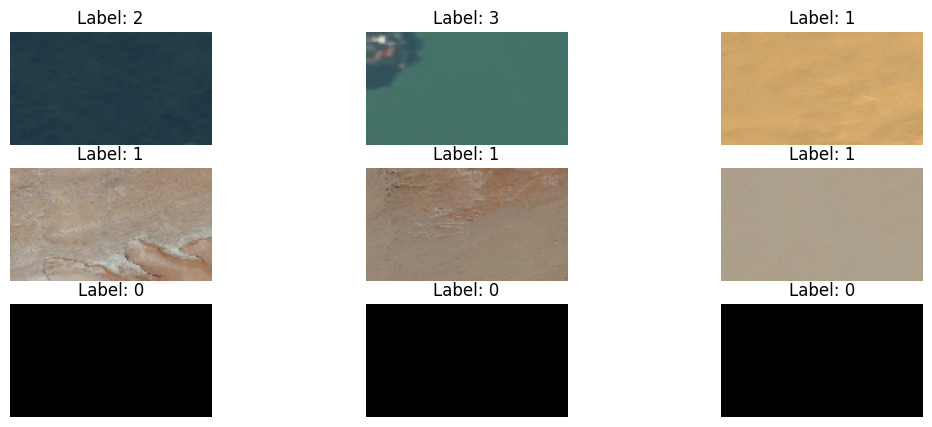

In [ ]:
# Print the first images with their labels
plt.figure(figsize=(13, 5))
for i, (images, labels) in enumerate(train.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(f"Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

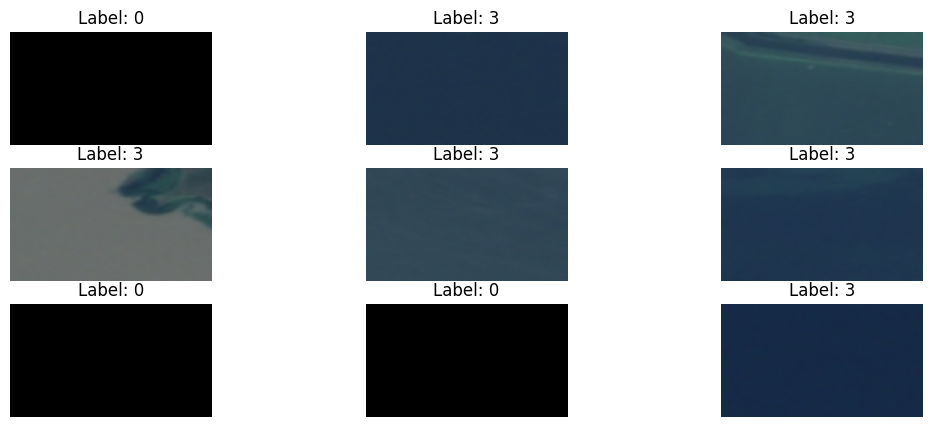

In [ ]:
plt.figure(figsize=(13, 5))
for i, (images, labels) in enumerate(val.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(f"Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

In [ ]:
classCount = len(set(label for _, labels in train for label in labels.numpy()))
print(f"There are {classCount} different Classes")

There are 4 different Classes


In [ ]:
classes = {
    0: "cloudy",
    1: "desert",
    2: "water",
    3: "green_area"
}

In [ ]:
# CNN model architecture
model = Sequential([
    layers.Input(shape=(height, width, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(amount)
])

# The first layer has 16 filters, kernel size equal to 3
# The max pooling layer allows to reduce the spatial dimensions
# The 2D feature flattened to 1D vector allows to prepare for the fully connected layer
# The fully connected layer has 128 neurons
# The output layer has 4 neurons (because there are 4 different classes)

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(
    train,
    validation_data=val,
    epochs=epochs
)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.7319 - loss: 0.5482 - val_accuracy: 0.8981 - val_loss: 0.2381
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 57s 121ms/step - accuracy: 0.8588 - loss: 0.2863 - val_accuracy: 0.9077 - val_loss: 0.2292
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 110ms/step - accuracy: 0.9101 - loss: 0.1986 - val_accuracy: 0.9218 - val_loss: 0.1730
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.9192 - loss: 0.1790 - val_accuracy: 0.9350 - val_loss: 0.1581
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.9288 - loss: 0.1564 - val_accuracy: 0.9095 - val_loss: 0.1853
Epoch 6/20
 54/143 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9306 - loss: 0.1492

In [ ]:
model.summary()

In [ ]:
# accuracy and loss
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(16, 5))
plt.plot(epochs_range, accuracy, label='Training Accuracy', color='green')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', color='red')
plt.legend(loc='lower right')
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [ ]:
plt.figure(figsize=(16, 5))
plt.plot(epochs_range, loss, label='Training Loss', color='green')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='red')
plt.legend(loc='upper right')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
# Predicting one image from the validation dataset
plt.figure(figsize=(6, 3))
for images, labels in val.take(1):
    sample_image = images[1]
    true_label = labels[1]

    sample_image = tf.expand_dims(sample_image, axis=0)

    predictions = model.predict(sample_image)

    predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
    predicted_class = classes[predicted_class_index]

    plt.imshow(sample_image[0].numpy().astype("uint8"))
    plt.title(f"True label: {classes[true_label.numpy()]}\nPredicted label: {predicted_class}")
    plt.axis('off')

plt.show()